<a href="https://colab.research.google.com/github/purendra25/ds/blob/master/SOM_Fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [143]:
data_set = pd.read_csv('Credit_Card_Applications.csv')

In [144]:
X = data_set.iloc[:,:-1].values
y = data_set.iloc[:,-1].values

In [145]:
#print(X)

In [146]:
#print(data_set)

In [147]:
#Featurre Scaling

In [148]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
X  = sc.fit_transform(X,y)

In [149]:
print(X)

[[8.42681467e-01 1.00000000e+00 1.25263158e-01 ... 5.00000000e-01
  5.00000000e-02 1.21200000e-02]
 [6.96090562e-01 0.00000000e+00 1.34135338e-01 ... 5.00000000e-01
  8.00000000e-02 0.00000000e+00]
 [3.88981656e-01 0.00000000e+00 2.38045113e-01 ... 5.00000000e-01
  1.40000000e-01 0.00000000e+00]
 ...
 [4.39420332e-01 0.00000000e+00 7.63909774e-02 ... 5.00000000e-01
  5.00000000e-02 0.00000000e+00]
 [8.44034934e-01 0.00000000e+00 2.05563910e-01 ... 5.00000000e-01
  6.00000000e-02 1.10000000e-04]
 [1.06907888e-01 1.00000000e+00 4.09774436e-01 ... 0.00000000e+00
  2.80000000e-01 0.00000000e+00]]


In [150]:
pip install minisom

In [151]:
from minisom import MiniSom  

In [152]:
som = MiniSom(x = 10, y=10, input_len=15, sigma=1.0, learning_rate=0.5)

In [153]:
som.random_weights_init(X)

In [154]:
som.train_random(data= X, num_iteration=100)

In [155]:
from pylab import bone,show,colorbar,plot,pcolor as pl

In [156]:
bone()

<Figure size 432x288 with 0 Axes>

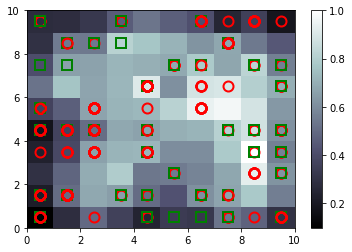

In [157]:
pcolor(som.distance_map().T)
colorbar()

markers = ['o','s']
colors = ['r','g']

for i,x in enumerate(X):
  w = som.winner(x)
  plot(w[0]+0.5
       ,w[1]+0.5,
       markers[y[i]],
       markeredgecolor = colors[y[i]],
       markerfacecolor = 'None',
       markersize=10,
       markeredgewidth = 2)
show()


In [160]:
mappings = som.win_map(X)
# fraud = np.concatenate((mappings[(1,6)],mappings[(7,2)]),axis=0)
fraud = mappings[(8,3)]
#print(fraud)

fraud = sc.inverse_transform(fraud)
print(fraud)

[[1.5608595e+07 0.0000000e+00 3.0420000e+01 1.3750000e+00 2.0000000e+00
  9.0000000e+00 8.0000000e+00 4.0000000e-02 0.0000000e+00 1.0000000e+00
  3.0000000e+00 0.0000000e+00 2.0000000e+00 0.0000000e+00 3.4000000e+01]
 [1.5666166e+07 0.0000000e+00 2.0080000e+01 1.2500000e-01 2.0000000e+00
  1.1000000e+01 4.0000000e+00 1.0000000e+00 0.0000000e+00 1.0000000e+00
  1.0000000e+00 0.0000000e+00 2.0000000e+00 2.4000000e+02 7.6900000e+02]]
